In [ ]:
# !pip install piml

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

# Data Pipeline

In [18]:
from piml import Experiment


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [3]:
exp_tw_credit = Experiment()
exp_bike_sharing = Experiment()
exp_tw_credit.data_loader("TaiwanCredit", silent=True)
exp_bike_sharing.data_loader("BikeSharing", silent=True)

In [24]:
tw_credit = exp_tw_credit
bike_sharing = exp_bike_sharing

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [25]:
# Count unique values in 'EDUCATION' for Taiwan credit data
num_unique_education = tw_credit['EDUCATION'].nunique()
print(f"There are {num_unique_education} unique values in the 'EDUCATION' data point.")

# Find the maximum 'cnt' value for bike sharing data
max_cnt = bike_sharing['cnt'].max()
print(f"The maximum value of 'cnt' in the bike sharing dataset is: {max_cnt}")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

TypeError: 'Experiment' object is not subscriptable

In [4]:
exp = Experiment()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [30]:
exp.data_loader()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Output()

In [27]:
exp.data_summary()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…

In [8]:
exp.data_loader()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Output()

In [9]:
exp.data_summary()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…

### Q1 (5pts): Using PiML, show data summary tables for both data sets.  What is the max value of `cnt` in the bike share data?  How many unique values are there in the `EDUCATION` data point of the Taiwan credit data?

* For Taiwan Credit the number of unique values for EDUCATION = 4
* 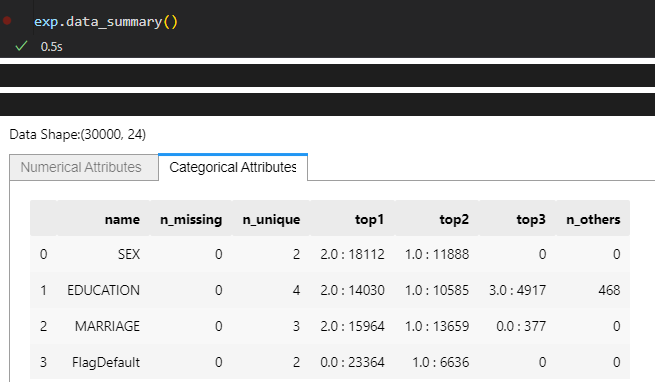

* For Bike Sharing the max value of cnt is = 977.0
* 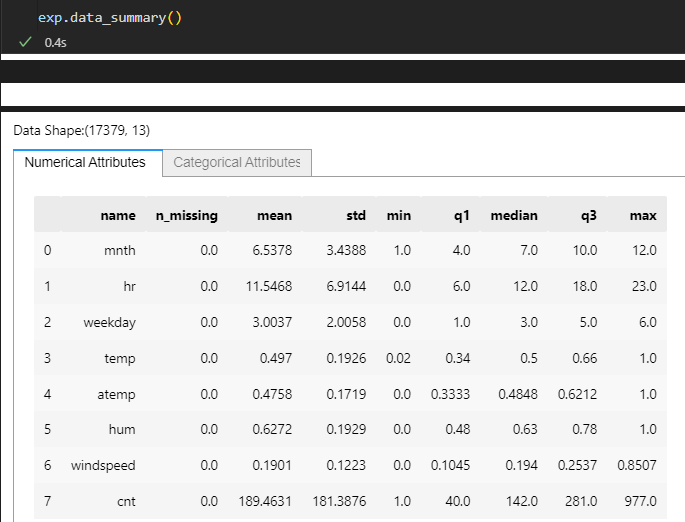

# Model Pipeline

In [32]:
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

exp_bike_sharing.data_prepare(random_state=100, target="cnt", test_ratio=0.2, task_type="regression", split_method="random", silent=True)
exp_tw_credit.data_prepare(random_state=100, target="FlagDefault", test_ratio=0.2, task_type="classification", split_method="random", silent=True)

exp_bike_sharing.model_train(model=XGBRegressor(max_depth=5, n_estimators=500), name="XGB_Bike_Sharing")
exp_bike_sharing.model_train(model=MLPRegressor(hidden_layer_sizes=[10]*2, activation="relu", random_state=0, early_stopping=True), name="DNN_Bike_Sharing")

exp_tw_credit.model_train(model=XGBClassifier(max_depth=5, n_estimators=500), name="XGB_TW_Credit")
exp_tw_credit.model_train(model=MLPClassifier(hidden_layer_sizes=[10]*2, activation="relu", random_state=0, early_stopping=True), name="DNN_TW_Credit")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

### Q2 (5pts): What does the `random_state` parameter do?  Will the XGB model for the bike sharing data turn out identical every time you run the code above?

* random_state 

    - The random_state parameter in machine learning code controls the randomness in processes like data splitting and model initialization. By setting it to a specific number, we ensure that these random steps will always produce the same results. This makes experiments reproducible, so we can tell if changes we make to the code actually improve performance.
    - In machine learning, many processes involve randomness, like splitting data into training and testing sets, initializing model parameters, or selecting features. random_state lets us control this randomness.

    - By setting random_state to a specific number (like 100 here), we ensure that these random processes will produce the same results every time you run the code. This makes experiments more reproducible and helps identify if changes that are made actually impact the model's performance.

    - If we don't specify random_state, the randomness will be based on the system's current time, which means the results will vary each time.

* Will the XGB Model be Identical?
    - The XGBoost model for bike sharing will not be completely identical every time we run it. This is because even though the data split will be the same due to random_state, XGBoost still has internal randomness in its training process.

    - The data will be split into training and testing sets using the same random seed.
    - The XGBoost model might have internal randomness in its initialization. However, random_state is not used directly in the XGBRegressor object. So the model initialization is still random.The training process itself can involve randomness, depending on the XGBoost algorithm's implementation.

### Q3 (2.5pts): What are the hyperparameters specified in each type of model?


* XGBoost Models (Regression and Classification):

    - max_depth: Controls the maximum depth of each individual decision tree in the ensemble. Higher values allow the model to learn more complex relationships but increase the risk of overfitting. Here it's set to 5.
    - n_estimators: Determines the number of decision trees in the ensemble. More trees generally lead to better performance but also increase training time. Here it's set to 500.

* MLP Models (Regression and Classification):

    - hidden_layer_sizes: Defines the number of neurons in each hidden layer of the neural network. Here, it's set to [10]*2, creating two hidden layers with 10 neurons each.
    - activation: Specifies the activation function used in the hidden layers. relu common as it can handle non-linear relationships in the data.
    - random_state: Controls the random initialization of the neural network's weights. Setting it to 0 ensures consistent weight initialization between runs.
    - early_stopping: This parameter enables early stopping, a technique that prevents overfitting by stopping training when the model's performance on a validation set starts to decrease.

## Bike sharing dataset with XGB model and DNN model

### Q4 (10 pts): Compute the reliability table (including empirical coverage and average bandwidth) of the two Bike Sharing models; which model is more reliable?

In [46]:


# XGB
reliability_xgb = exp_bike_sharing.model_diagnose(model="XGB_Bike_Sharing", show="reliability_table")

# DNN
reliability_dnn = exp_bike_sharing.model_diagnose(model="DNN_Bike_Sharing", show="reliability_table")


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,Empirical Coverage,Average Bandwidth
0,0.8813,0.1042


,Empirical Coverage,Average Bandwidth
0,0.8856,0.1874


XGBoost has a narrower bandwith than the DNN Model. XGB would be more reliable than the DNN model

### Q5 (5 pts): Use the `reliability_distance` function in PiML on the XGB model of the bike sharing data.  List the top 5 features that have the largest distributional distance between unreliable regions and reliable regions based on PSI score. (You can use the defaults for all other arguments of `model_diagnose`)


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

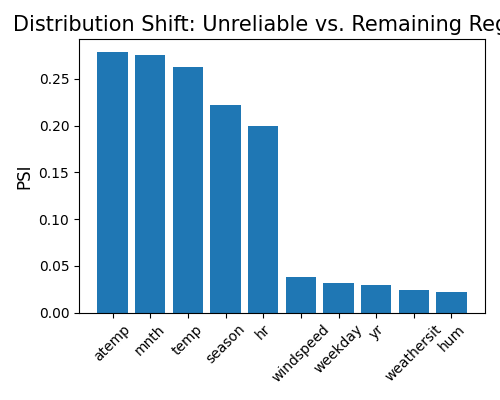

In [37]:
exp_bike_sharing.model_diagnose(model="XGB_Bike_Sharing", show="reliability_distance", alpha=0.1,
                   threshold=1.1, distance_metric="PSI", figsize=(5, 4))

The top 5 features of ths XGB are: XGB: atemp, mnth, temp, season, hr

### Q6 (5 pts): Do the same analysis as in Q5, but use a threshold of 1.3.  Why did the PSI values increase?


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

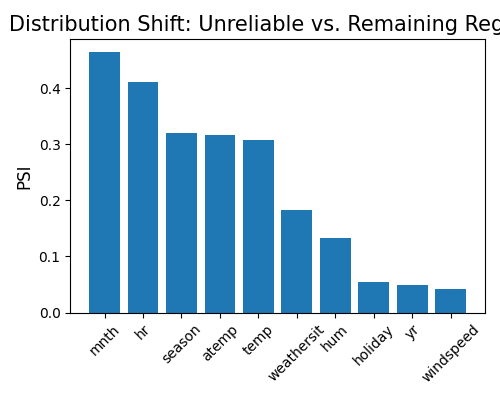

In [38]:
exp_bike_sharing.model_diagnose(model="XGB_Bike_Sharing", show="reliability_distance", alpha=0.1,
                   threshold=1.3, distance_metric="PSI", figsize=(5, 4))

* The PSI values increased because the threshold for defining a region as "unreliable" was changed from 1.0 to 1.3.

* [PSI (Population Stability Index) measures how much the distribution of a variable has changed between two populations (e.g., training vs. testing data).
A higher threshold means a larger difference is needed to be considered unreliable. ]

* A higher threshold (1.3) means that more regions are now considered "unreliable." This is because a larger change in the distribution is needed to trigger the "unreliable" label. Since more regions are now considered unreliable, the overall impact on the distribution is greater, resulting in higher PSI values.



### Q7 (2.5 pts): Do the same analysis as in Q6, but use the Wasserstein distance measure instead of PSI.  Are the results the same?


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

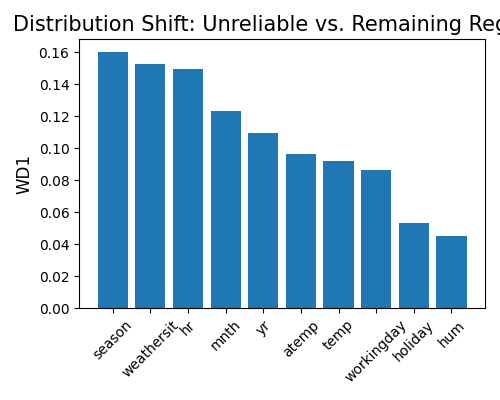

In [40]:
exp_bike_sharing.model_diagnose(model="XGB_Bike_Sharing", show="reliability_distance", alpha=0.1, threshold= 1.3, distance_metric='WD1',figsize=(5, 4))

* No, the results of the PSI and Wasserstein distance analyses are not the same. 

* While both measure distribution shifts, they focus on different aspects:

    - PSI: Detects changes in the proportions of values within a distribution.

    - Wasserstein Distance: Measures the overall shape change in the distribution.

* They highlight different features as potentially unreliable, leading to different results.

### Q8 (5 pts): Do the same analysis as in Q5, but for the DNN model.  Are the results the same as Q5?  Why or why not?


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

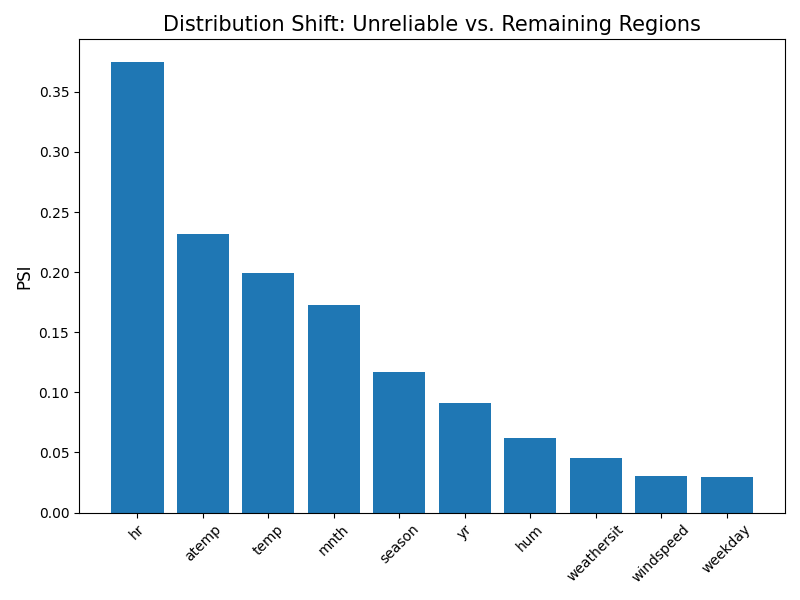

In [41]:
exp_bike_sharing.model_diagnose(model="DNN_Bike_Sharing", show="reliability_distance")
# exp_bike_sharing.model_diagnose(model="XGB_Bike_Sharing", show="reliability_distance", 
#                               alpha=0.1,threshold=1.1, distance_metric="PSI", figsize=(5, 4))

* The results are not the same. The DNN model shows more sensitivity to the 'hr' feature compared to the XGB model. 


    - DNNs have a more complex structure and can capture more time-dependent patterns, which makes them more sensitive to changes in hourly trends.

    - XGBoost relies on tree splitting algorithms, which might be simpler and less sensitive to subtle changes in hourly patterns compared to the DNN's ability to handle non-linear relationships.

### Q9 (5 pts): How could the analysis above help you if you were in charge of monitoring a model in production?

* This analysis helps monitor model stability in production by identifying features with significant distribution shifts. 
* Features with high PSI or Wasserstein Distance indicate potential data drift, which can lead to model performance degradation. 
* Monitoring these features helps identify the need to retrain the model or adapt the features to maintain accuracy. These insights also help detect the severity of model drift, pinpoint the features causing it, and assess the overall stability over time, contributing to fairness and mitigating biases.

### Q10 (5 pts): For the `XGB_Bike_Sharing` model, write the PiML code to show the weak regions of the `hr` feature.  Use MSE as the measurement metric and include the test data in the results.  Use the `histogram` method for slicing.





HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

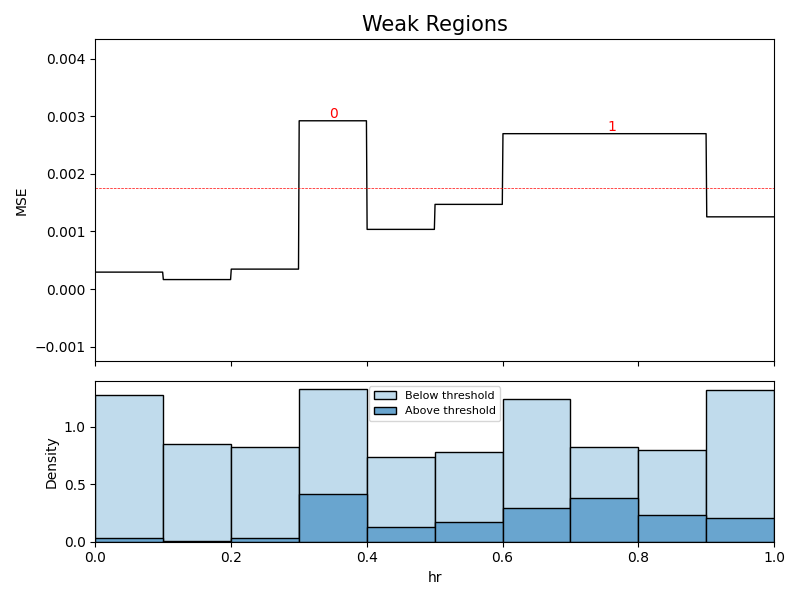

In [42]:
exp_bike_sharing.model_diagnose(model="XGB_Bike_Sharing", show="weakspot", slice_method="histogram", slice_features=["hr"], metric="MSE", use_test=True)

### Q11 (5 pts): Is hour 3 or hour 4 part of a weak region in the analysis of Q10?

Neither hour 3 nor hour 4 are part of a weak region in the analysis.

The top plot shows that both hours 3 and 4 have MSE values above the threshold. The bottom plot shows that both hours 3 and 4 are in the "above threshold" region of the histogram. This means they are considered stronger regions, not weak ones.

### Q12 (5 pts): If you do the same analysis of Q10 for the DNN model, does it have the same weak regions for the `hr` feature?

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

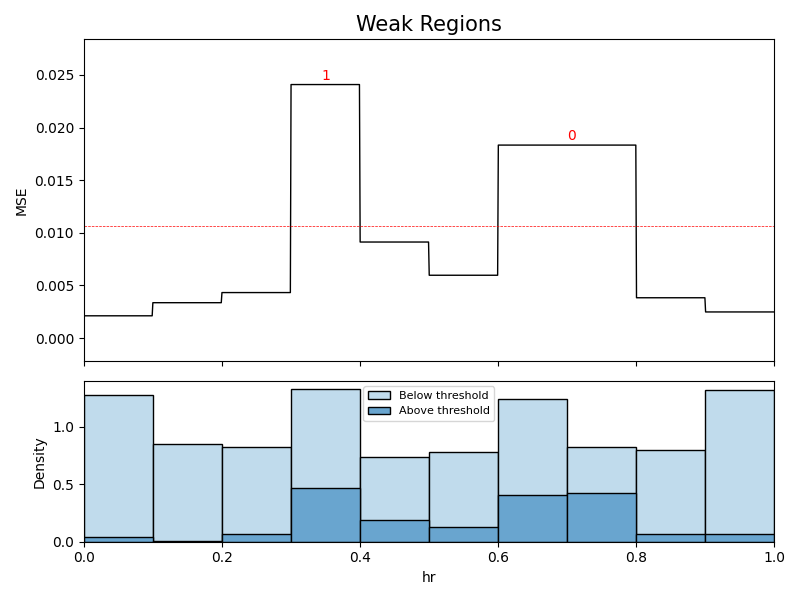

In [43]:
exp_bike_sharing.model_diagnose(model="DNN_Bike_Sharing", show="weakspot", slice_method="histogram", slice_features=["hr"], metric="MSE", use_test=True)

The DNN model does not have the exact same weak regions as the XGB model for the 'hr' feature. DNN has more pronounced errors around certain hours compared to the XGB model, suggesting that it is capturing the temporal patterns differently.

### Q13 (5 pts): Do these weak regions mean that the model should not be used?  What might be done to improve the model in these regions?

Weak regions in a model don't necessarily mean it's unusable. They indicate areas where the model is less reliable, especially for specific time periods and may not generalize well. To improve the model in these regions, consider techniques like feature engineering, categorization of time variables, adding data to weak regions, resampling, or fine-tuning model parameters for better generalization.

### Q14 (10 pts): For the DNN model on the bike sharing data, analyze the weak spots for the `workingday` feature, based on testing data and MSE metric and historgram slicing.  What is the number of test samples in the weak region?  What is the difference from the test samples in the weak region to the MSE of the test data in the overall model?


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

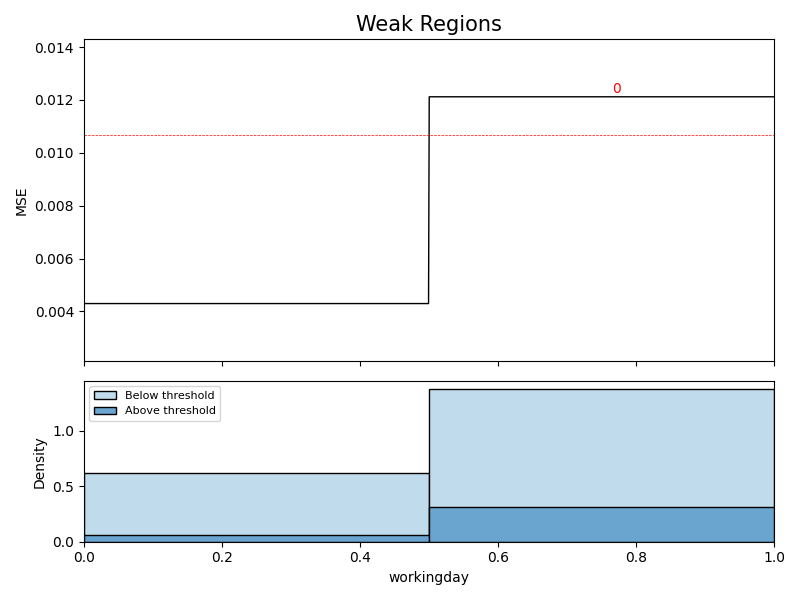

In [44]:
exp_bike_sharing.model_diagnose(model="DNN_Bike_Sharing", show="weakspot", slice_method="histogram", slice_features=["workingday"], metric="MSE", use_test=True, return_data=True)

The weak region in the 'workingday' feature is for working days (value of 1). Approximately 50% of the test data falls in this weak region. The MSE in the weak region is higher (by about 0.007) than in the non-weak region (non-working days), indicating that the model performs worse on working days.

### Q15 (10 pts): Compare the MSE and R2 for the two models used in biking sharing data set, for both training sample and testing. Plot the box plot for MSE and bar plot for R2.  Which model performs better based on out-of-sample evaluation metrics?

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

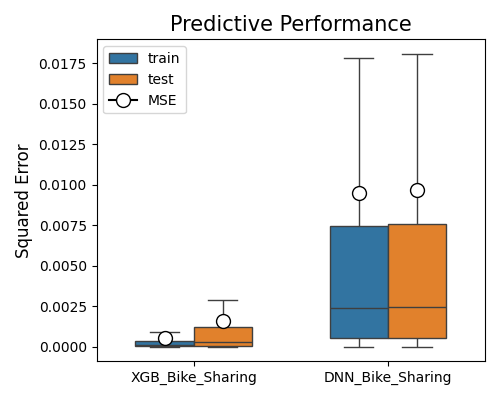

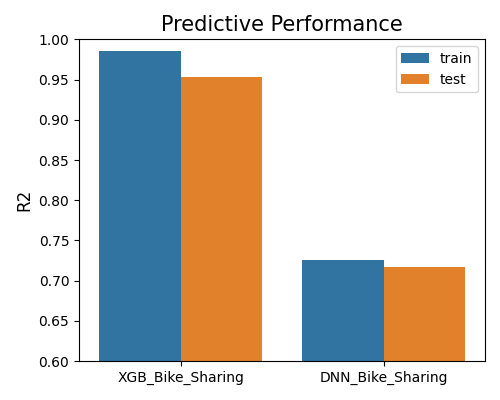

In [45]:

# MSE
exp_bike_sharing.model_compare(models=["XGB_Bike_Sharing", "DNN_Bike_Sharing"], show="accuracy_plot", metric="MSE", figsize=(5, 4))

#R2
exp_bike_sharing.model_compare(models=["XGB_Bike_Sharing", "DNN_Bike_Sharing"], show="accuracy_plot", metric="R2", figsize=(5, 4))

* Based on the box-plots and predictive performance on the bar graph, the XGB model is performing better compared to the DNN. 
* XGB has lower mean squared error and higher R2, likely meaning that it is better at generalizing the data overall and making more accurate predictions on the unseen data.

## Taiwan (TW) credit dataset with XGB model and DNN model

### Q16 (10 pts): Different from regression models, what may need to be calibrated in a classification model?  Use PiML to plot the reliability diagrams (or calibration curves) for both of the Taiwan credit data set models.  Then add a copy of that plot with 100 bins.  Which model is more reliable before calibration for the Taiwan credit data set?

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

-----------------------------------------------------------------------------------------------------------------------------------------
Reliability Diagram - XGB - Taiwan Credit


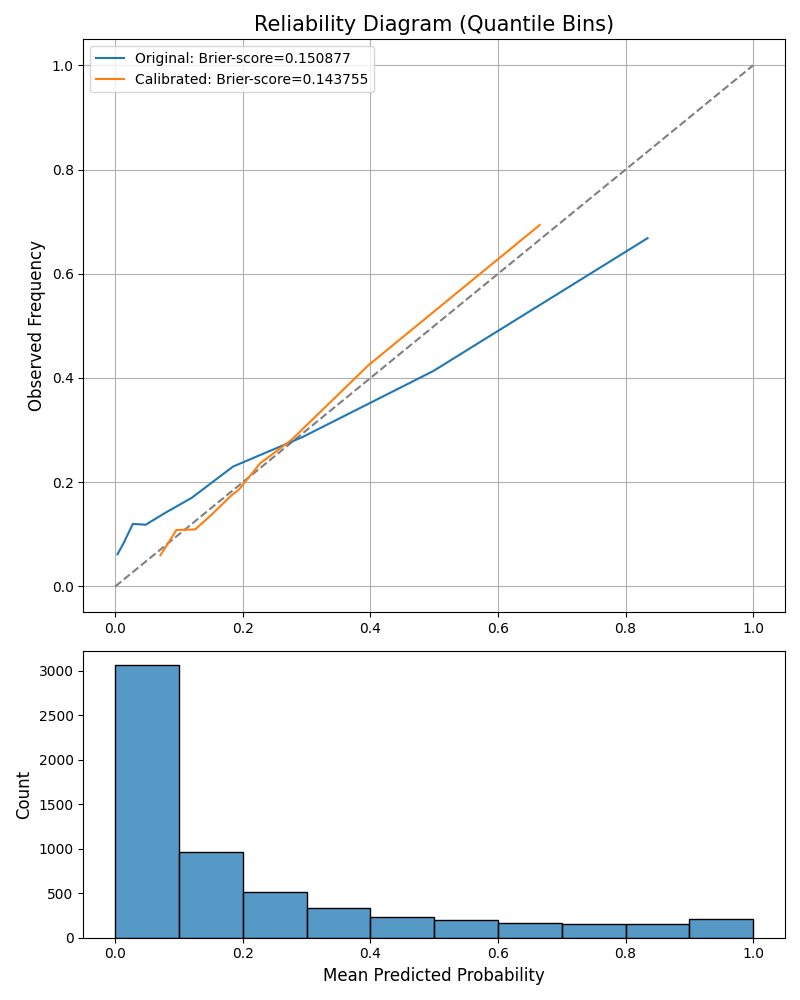

-----------------------------------------------------------------------------------------------------------------------------------------
Reliability Diagram - DNN - Taiwan Credit


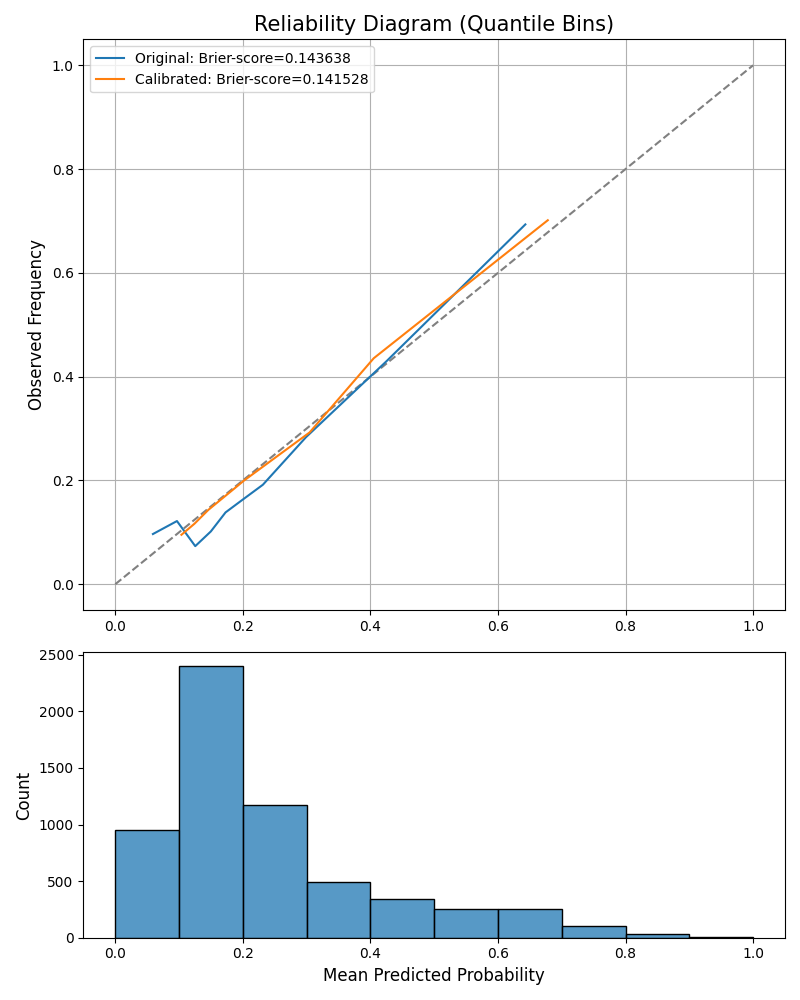

-----------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------ Using 100 Bins -------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------------------------------------------------
Reliability Diagram - XGB - Taiwan Credit 100 Bins


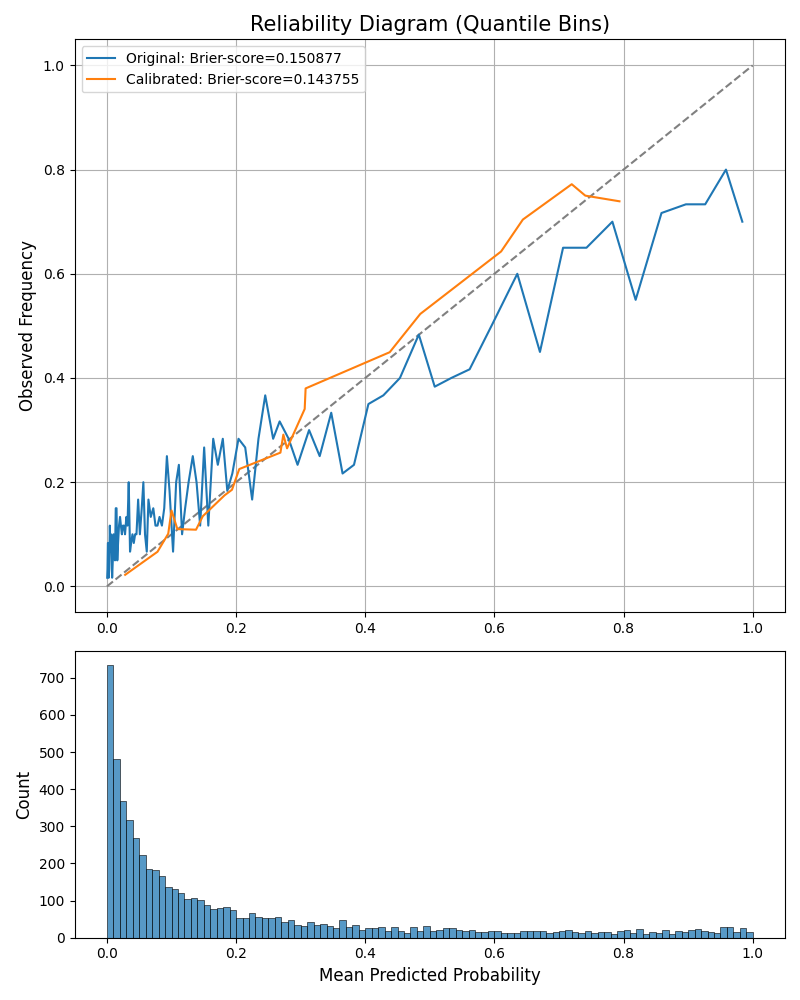

-----------------------------------------------------------------------------------------------------------------------------------------
Reliability Diagram DNN Taiwan Credit 100 Bins


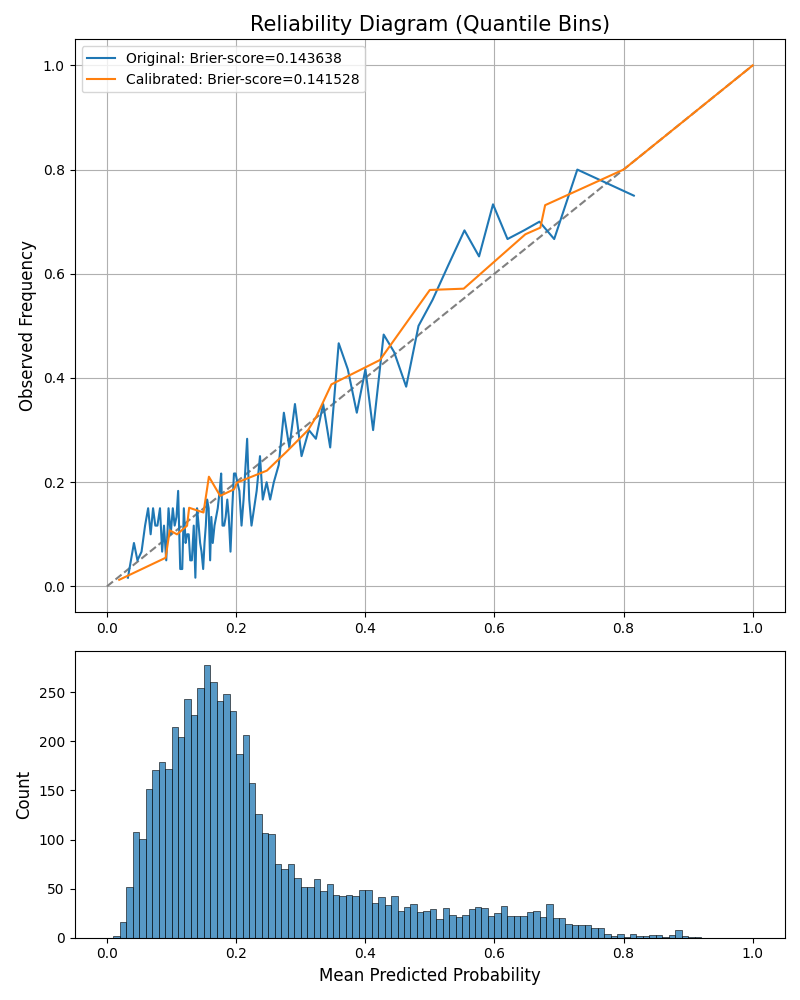

-----------------------------------------------------------------------------------------------------------------------------------------


In [47]:
print("-----------------------------------------------------------------------------------------------------------------------------------------")

print("Reliability Diagram - XGB - Taiwan Credit")
exp_tw_credit.model_diagnose(model="XGB_TW_Credit", show="reliability_perf", figsize=(8, 10))

print("-----------------------------------------------------------------------------------------------------------------------------------------")

print("Reliability Diagram - DNN - Taiwan Credit")
exp_tw_credit.model_diagnose(model="DNN_TW_Credit", show="reliability_perf", figsize=(8, 10))

print("-----------------------------------------------------------------------------------------------------------------------------------------")
print("------------------------------------------ Using 100 Bins -------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------------------------------------------------")

print("Reliability Diagram - XGB - Taiwan Credit 100 Bins")
exp_tw_credit.model_diagnose(model="XGB_TW_Credit", show="reliability_perf", bins=100, figsize=(8, 10))

print("-----------------------------------------------------------------------------------------------------------------------------------------")

print("Reliability Diagram DNN Taiwan Credit 100 Bins")
exp_tw_credit.model_diagnose(model="DNN_TW_Credit", show="reliability_perf", bins=100, figsize=(8, 10))

print("-----------------------------------------------------------------------------------------------------------------------------------------")

* In classification models, we need to calibrate

    - Predicted Probabilities: To ensure they reflect the true likelihood of belonging to each class.

    - Decision Threshold: To account for imbalanced classes, finding a balance between minimizing false positives and false negatives.

DNN model is more accurate before calibration.

* The DNN's calibration curve is closer to the ideal diagonal line than the XGB model's curve. This indicates that the DNN model's predicted probabilities more closely align with the actual observed frequencies.

* The DNN model has a slightly better Brier score than the XGB model, further supporting the idea that its predicted probabilities are more accurate.

* While both models exhibit some degree of miscalibration, the DNN model appears to be more reliable in terms of its predicted probabilities before any calibration is applied.

### Q17 (5 pts): For the two models of TW credit dataset, which model performs better and why? Does any model potentially have overfitting problem and why?

* The DNN model for the TW credit dataset performs better before calibration, as indicated by its closer calibration curve and slightly better Brier score. However, both models, especially the DNN have potential for overfitting.

* Overfitting is a concern with complex models like DNNs due to their high flexibility and the potential for memorizing the training data too well. The imbalanced nature of the TW credit dataset can exacerbate overfitting.

* To assess overfitting, compare the performance on the training set versus the test set. A significant drop in performance on the test set suggests overfitting. We can consider using regularization techniques (like dropout or other techniques) during training to mitigate this issue.

In [48]:
# End of Assignment - Uma Chavali

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…